# Tutorial 1 - Drawing a simple Tree


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["pdf.fonttype"]=42
mpl.rcParams['ps.fonttype'] = 42

import numpy as np
import pandas as pd

import sys
# un-comment out the next line to allow it to be run
#sys.path.append("path/to/baltic/folder")

# library containing main class defs, mostly written by Gytis
import baltic3 as bt
# lib containing utility functions, written by yours truly
import baltic3_utils as btu

## 1. Data Loading Section

This looks a bit silly because it's only one line, but more complex visualizations will involve loading more data.

In [2]:
# read tree
tre = btu.austechia_read_tree("simpletree.tre", date_delim="_")

Number of objects found in tree string: 6

Tree height: 0.900000
Tree length: 1.500000
annotations present

Numbers of objects in tree: 6 (2 nodes and 4 leaves)

Highest tip date: 2017.0000


## 2. Some basic functions

In [3]:
# Get all leaves in a list
leaves_ls = tre.leaves

# get all internal nodes in a list
inodes_ls = tre.nodes

# get all internal nodes and leaves in a list
nodes_ls = tre.Objects

# what's the height of the tree?
print("tree height = %.4f" % tre.treeHeight)

# get the tree in newick format (very rarely used)
treestring = tre.toString()
print("tree string = ")
print(treestring)

# span of the y coordinates
# I've never used this before, but this seems useful
y_span = tre.ySpan

tree height = 0.9000
tree string = 
(('C_2015':0.300000,'D_2012':0.400000):0.500000,'A_2010':0.100000,'B_2017':0.200000):0.000000;


## 3. Param Declaration Section

Very elaborate. This is a very simple example, so it's easy to visualize what needs to go where, but be prepared to iteratively rerun this section and the next to do all manner of minor tweaks. 

In [4]:
# =================================== PARAMS ===================================
# LAYOUT
fig_h = 5 # figure height
fig_w = 8 # figure width
# Note: A4 proportions are 210 x 297 mm. 
# Set according to these proportions, scaling up or down as required.

# TREE PARAMS
branchWidth=0.5 # line thickness of branches
s=1 # tip shape size. 
x_offset= 0.00001
#It may be necessary to push the tree to the left to make room for the legend
#Otherwise, set this to an arbitrarily small number

# TIPNAMES & C/N LINES
tipname_x = tre.treeHeight * 1.02
tipname_fontsize = 4
dotted_line_c = '#7a9fa5' # this is a sort of sea green colour

# TEXT PARAMS
title_text = "My Simple Tree" # \n creates a new line
title_text_size = 20
title_x = 0.0001
title_y = 4
tipname_x_offset = 0.01
tipname_fontsize = 12

# OTHER
show_axes = True # shows the x and y axes
show_grid = False

leaf_ycoord_max = 0 # what're these?
leaf_ycoord_min = len(tre.leaves)
for lf in tre.leaves:
    if lf.y > leaf_ycoord_max:
        leaf_ycoord_max = lf.y
    elif lf.y < leaf_ycoord_min:
        leaf_ycoord_min = lf.y


## 4. Plot!

Done in 0.15s


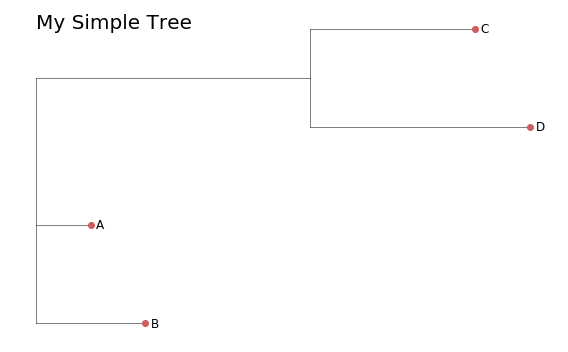

In [5]:
fig,ax = plt.subplots(figsize=(fig_w, fig_h),facecolor='w')


for k in tre.Objects:
    c = 'k'
    x=k.height
    y=k.y

    xp = k.parent.height
    if x is None: # matplotlib won't plot Nones, like root
        x = x_offset
    if xp==None:
        xp = x + x_offset

    if isinstance(k,bt.leaf) or k.branchType=='leaf':
        ax.scatter(x, y, color="indianred", zorder=12)
        
        # Draw tipname next to tip
        ax.text(x+tipname_x_offset, y, 
                k.name.split("_")[0], 
                verticalalignment="center",
                fontsize=tipname_fontsize)

    elif isinstance(k,bt.node) or k.branchType=='node':
        ax.plot([x,x],
                [k.children[-1].y,k.children[0].y],
                lw=branchWidth,
                color='k',ls='-',zorder=9)

    # Draw horizontal lines
    ax.plot([xp,x],[y,y],lw=branchWidth,color='k',ls='-',zorder=9)

# Add title
ax.text(title_x, title_y, title_text, fontsize=title_text_size)

# remove tick marks and borders
ax.set_yticks([])
ax.set_xticks([])
plt.axis('off')
plt.tight_layout()

# Saves the figure to a pdf. 
#plt.savefig("my_simple_tre.pdf", bbox_inches="tight")


plt.show()